In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import tree
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
%matplotlib inline

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
from sklearn.ensemble import RandomForestRegressor

## Preparation etc

In [13]:
df = pd.read_csv("train.csv", index_col='Id' )

In [14]:
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [15]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [9]:
train.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [10]:
X = train.copy()

In [11]:
X.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [12]:
X = pd.get_dummies(X)

In [13]:
X.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,NaN,0,11,184966.930730,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,240.0,1,16,300009.450063,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,229.0,1,3,220925.908524,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,1084.0,0,5,175616.227217,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,2078.0,2,4,150226.531644,0,1,0,1,0,1


In [14]:
X = X.fillna({'LifeSquare': X.LifeSquare.median()})

In [15]:
X = X.fillna({'Healthcare_1': X.Healthcare_1.median()})

In [16]:
X.isnull().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Price            0
Ecology_2_A      0
Ecology_2_B      0
Ecology_3_A      0
Ecology_3_B      0
Shops_2_A        0
Shops_2_B        0
dtype: int64

<AxesSubplot:>

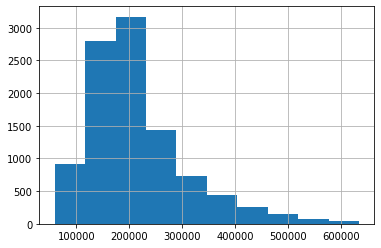

In [17]:
X.Price.hist()

In [18]:
X = X.drop(['Price'], axis = 1)

In [19]:
X.head(2)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.08904,...,5,900.0,0,11,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.00007,...,1,240.0,1,16,0,1,0,1,0,1


In [20]:
y = train['Price']

In [21]:
y.head()

0    184966.930730
1    300009.450063
2    220925.908524
3    175616.227217
4    150226.531644
Name: Price, dtype: float64

In [22]:
clf = tree.DecisionTreeRegressor()

In [23]:
parameters = {'max_depth' : range(1,30)}

In [24]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv = 5)

In [25]:
grid_search_cv_clf.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 30)})

In [26]:
grid_search_cv_clf.best_params_

{'max_depth': 8}

In [27]:
best_clf = grid_search_cv_clf.best_estimator_

In [28]:
best_clf.score(X, y)

0.7263668902697565

In [29]:
feature_importances = best_clf.feature_importances_

In [31]:
feature_importances_df = pd.DataFrame({'features': list(X),
                                       'feature_importances':feature_importances})

In [32]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
3,Square,0.467279
11,Social_2,0.137716
2,Rooms,0.109318
10,Social_1,0.086239
12,Social_3,0.056502
9,Ecology_1,0.033252
1,DistrictId,0.031859
15,Shops_1,0.017615
13,Healthcare_1,0.014813
5,KitchenSquare,0.014489


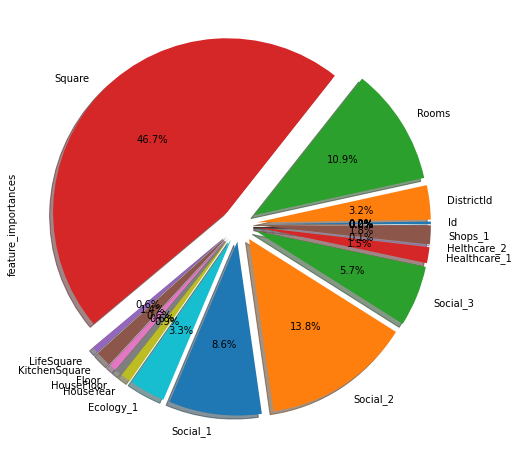

In [33]:
feature_importances_df.plot.pie(
                        explode=[0.1]*len(X.columns),
                        labels = feature_importances_df.features,
                        y = 'feature_importances',
                        autopct='%1.1f%%',
                        shadow=True,
                        legend=False,
                        figsize=(8, 8));

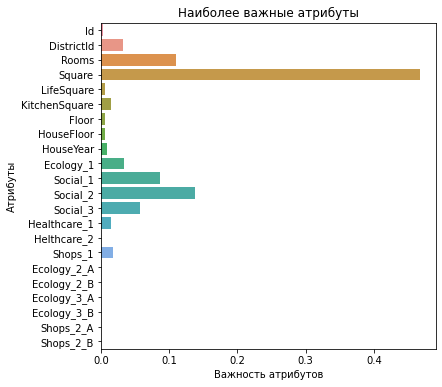

In [34]:
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(y=feature_importances_df.features, x=feature_importances_df.feature_importances)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

In [63]:
test_frw = pd.read_csv("test.csv")

In [64]:
X_test = test_frw.copy()

In [66]:
X_test = pd.get_dummies(X_test)

In [70]:
X_test = X_test.fillna({'LifeSquare': X.LifeSquare.median()})

In [71]:
X_test = X_test.fillna({'Healthcare_1': X.Healthcare_1.median()})

In [78]:
X_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,1,900.0,0,0,0,1,0,1,0,1
1,15856,74,2.0,69.263183,32.781260,1.0,6,1.0,1977,0.075779,...,3,900.0,0,2,0,1,0,1,0,1
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,...,87,4702.0,5,5,0,1,0,1,0,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,3,900.0,3,3,0,1,0,1,0,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,...,1,900.0,0,0,0,1,0,1,1,0


In [73]:
X_test.isnull().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Ecology_2_A      0
Ecology_2_B      0
Ecology_3_A      0
Ecology_3_B      0
Shops_2_A        0
Shops_2_B        0
dtype: int64

In [74]:
# y_pred = best_clf.predict(X_test)

In [112]:
# result = pd.Series(y_pred)

In [113]:
# submission = X_test['Id']

In [122]:
# frame = {'Id':submission, 'Price': result}

In [123]:
# submission_result = pd.DataFrame(frame)

In [124]:
# submission_result

,Id,Price
0,725,157148.742650
1,15856,162421.531868
2,5480,198294.346023
3,15664,325355.085582
4,14275,139961.723597
...,...,...
4995,8180,216527.133695
4996,4695,130723.069350
4997,5783,325355.085582
4998,4780,210078.200037


In [125]:
# submission_result.to_csv('result.csv', index = False)

## Processing

In [1]:
test_frw = pd.read_csv("train.csv")

NameError: name 'pd' is not defined

In [135]:
X_rf = test_frw.copy()

In [136]:
X_rf.shape

(10000, 20)

In [137]:
X_rf.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [138]:
id = X_rf['Id']

In [140]:
X_rf = pd.get_dummies(X_rf)

In [142]:
X_rf.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,NaN,0,11,184966.930730,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,240.0,1,16,300009.450063,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,229.0,1,3,220925.908524,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,1084.0,0,5,175616.227217,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,2078.0,2,4,150226.531644,0,1,0,1,0,1


In [143]:
X_rf = X_rf.fillna({'LifeSquare': X.LifeSquare.median()})

In [144]:
X_rf = X_rf.fillna({'Healthcare_1': X.Healthcare_1.median()})

In [145]:
X_rf = X_rf.drop(['Shops_2_B', 'Shops_2_A'], axis = 1)

In [146]:
X_rf = X_rf.drop(['Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Id', 'LifeSquare'], axis = 1)

In [147]:
X_rf = X_rf.drop(['Floor', 'HouseFloor', 'HouseYear'], axis = 1)

In [172]:
y_train = X_rf['Price']

In [176]:
X_rf = X_rf.drop('Price', axis = 1)

In [177]:
X_rf.head()

,DistrictId,Rooms,Square,KitchenSquare,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
0,35,2.0,47.981561,6.0,0.089040,33,7976,5,900.0,0,11
1,41,3.0,65.683640,8.0,0.000070,46,10309,1,240.0,1,16
2,53,2.0,44.947953,0.0,0.049637,34,7759,0,229.0,1,3
3,58,2.0,53.352981,9.0,0.437885,23,5735,3,1084.0,0,5
4,99,1.0,39.649192,7.0,0.012339,35,5776,1,2078.0,2,4


In [178]:
clf_rf = RandomForestRegressor()

In [179]:
 parameters = {'criterion':['mse'],
#              'n_estimators': 100, 
              'max_depth' : range(5, 8, 1), 
              'min_samples_leaf': range(2, 5, 1), 
              'min_samples_split': range (2, 5, 1)}

In [180]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv = 3, n_jobs = 1)

In [183]:
grid_search_cv_clf.fit(X_rf, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'criterion': ['mse'], 'max_depth': range(5, 8),
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': range(2, 5)})

In [184]:
grid_search_cv_clf.best_params_

{'criterion': 'mse',
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [185]:
best_clf = grid_search_cv_clf.best_estimator_

In [186]:
best_clf.score(X_rf, y)

0.7320867142106666

**test processing**

In [187]:
X_test = pd.read_csv('test.csv')

In [188]:
X_test.shape

(5000, 19)

In [189]:
X_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [190]:
id = X_test['Id']

In [191]:
X_test = X_test.fillna({'LifeSquare': X.LifeSquare.median()})

In [192]:
X_test = X_test.fillna({'Healthcare_1': X.Healthcare_1.median()})

In [193]:
X_test = pd.get_dummies(X_test)

In [194]:
X_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,1,900.0,0,0,0,1,0,1,0,1
1,15856,74,2.0,69.263183,32.925087,1.0,6,1.0,1977,0.075779,...,3,900.0,0,2,0,1,0,1,0,1
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,...,87,4702.0,5,5,0,1,0,1,0,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,3,900.0,3,3,0,1,0,1,0,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,...,1,900.0,0,0,0,1,0,1,1,0


In [195]:
X_test = X_test.drop(['Shops_2_B', 'Shops_2_A'], axis = 1)

In [196]:
X_test = X_test.drop(['Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Id', 'LifeSquare'], axis = 1)

In [197]:
X_test = X_test.drop(['Floor', 'HouseFloor', 'HouseYear'], axis = 1)

In [198]:
X_test.head()

,DistrictId,Rooms,Square,KitchenSquare,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
0,58,2.0,49.882643,6.0,0.310199,11,2748,1,900.0,0,0
1,74,2.0,69.263183,1.0,0.075779,6,1437,3,900.0,0,2
2,190,1.0,13.597819,12.0,0.000000,30,7538,87,4702.0,5,5
3,47,2.0,73.046609,9.0,0.101872,23,4583,3,900.0,3,3
4,27,1.0,47.527111,1.0,0.072158,2,629,1,900.0,0,0


In [199]:
y_pred = best_clf.predict(X_test)

In [200]:
result = pd.Series(y_pred)

In [202]:
X_test.shape

(5000, 11)

In [204]:
submission = id

In [205]:
frame = {'Id':submission, 'Price': result}

In [206]:
submission_result = pd.DataFrame(frame)

In [207]:
submission_result.to_csv('result.csv', index = False)